# Tesla Stock Trend Prediction using Decision Tree and Linear Regression

In this notebook Tesla's trend prediction is done using decision tree and linear regression. Its containing 10 year daily stock price from start day up to this date(March, 26th 2021). the dateset is downloaded from Yahoo finance.


## Importing Libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/TSLA2.csv') 

## Data and it's charachteristics

In [3]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [4]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
2699,2021-03-19,646.599976,657.229980,624.619995,654.869995,654.869995,42827400
2700,2021-03-22,684.590027,699.619995,668.750000,670.000000,670.000000,39512200
2701,2021-03-23,675.770020,677.799988,657.510010,662.159973,662.159973,30491900
2702,2021-03-24,667.909973,668.020020,630.109985,630.270020,630.270020,33795200
2703,2021-03-25,613.000000,645.500000,609.500000,640.390015,640.390015,39150700


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2704 non-null   object 
 1   Open       2704 non-null   float64
 2   High       2704 non-null   float64
 3   Low        2704 non-null   float64
 4   Close      2704 non-null   float64
 5   Adj Close  2704 non-null   float64
 6   Volume     2704 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.0+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2.704000e+03
mean,75.581550,77.260928,73.737572,75.619055,75.619055,3.185467e+07
std,137.268699,140.552254,133.388883,137.324469,137.324469,2.906588e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,7.630500,7.739000,7.482500,7.621000,7.621000,1.149500e+07
50%,44.845999,45.656999,44.152000,44.906999,44.906999,2.516850e+07
75%,62.050999,62.944999,60.748499,61.942000,61.942000,4.109040e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


In [7]:
df.shape

(2704, 7)

Our data is consisted of 2407 raws and 7 columns

- Open Price : The Stock at which opens at the start of market

- High price : The particular stock which made high during that particular day

- Low Price : The Particular stock which made Low during that particular day

- Close Price : The stock closing at the end of the Market hours

- Trading Volume is a measre of how much of a given financial asset has traded in a period of time.
- Adjusted closing price analyzes the stock's dividends, stock splits and new stock offerings to determine an adjusted value. 


### Visualizing the opening prices of the data.


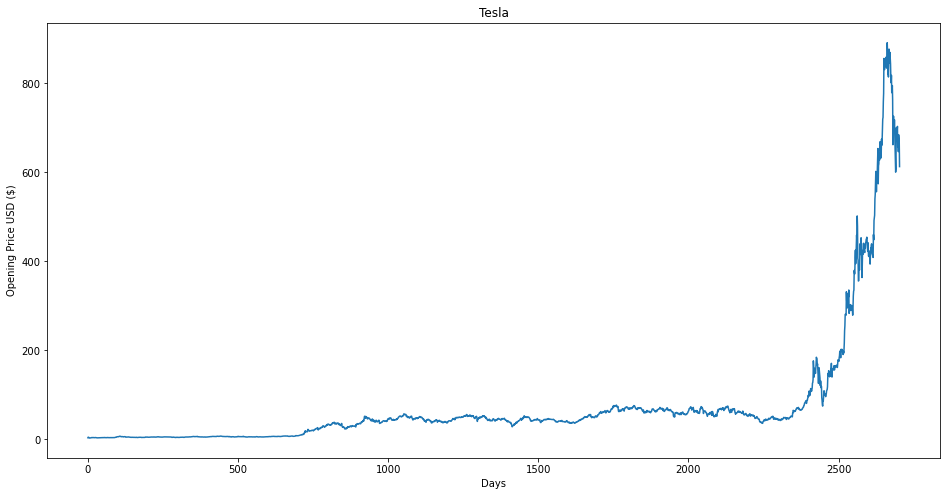

In [9]:
plt.figure(figsize=(16,8))
plt.title('Tesla')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['Open'])
plt.show()



### Visualizing the high prices of the data.


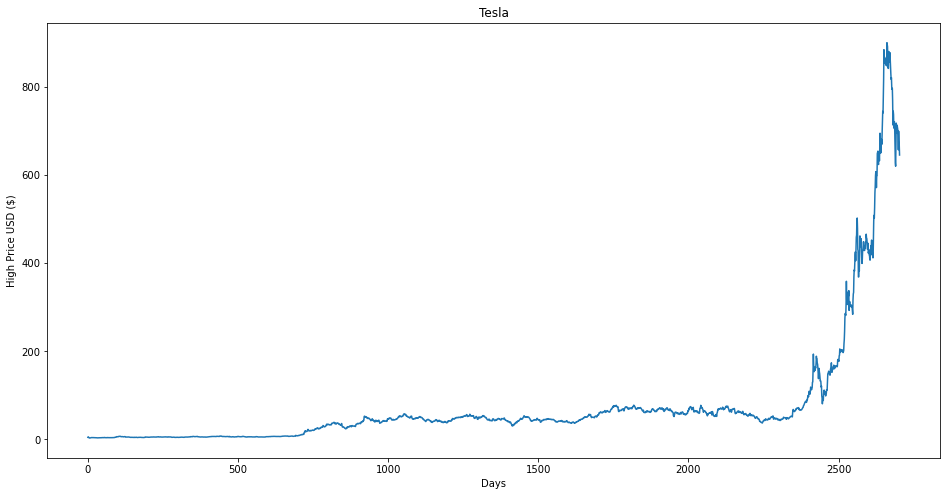

In [10]:
plt.figure(figsize=(16,8))
plt.title('Tesla')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['High'])
plt.show()


### Visualizing the low prices of the data.

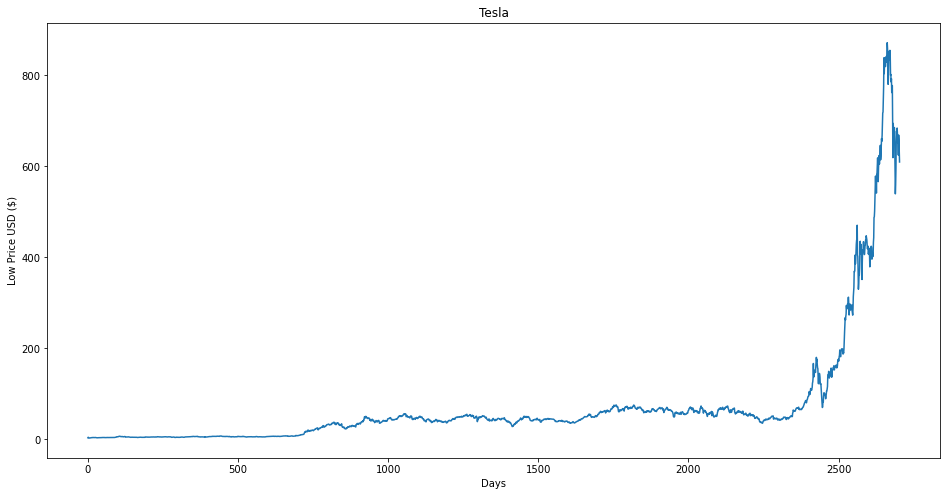

In [11]:
plt.figure(figsize=(16,8))
plt.title('Tesla')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(df['Low'])
plt.show()

### Visualizing the low prices of the data.

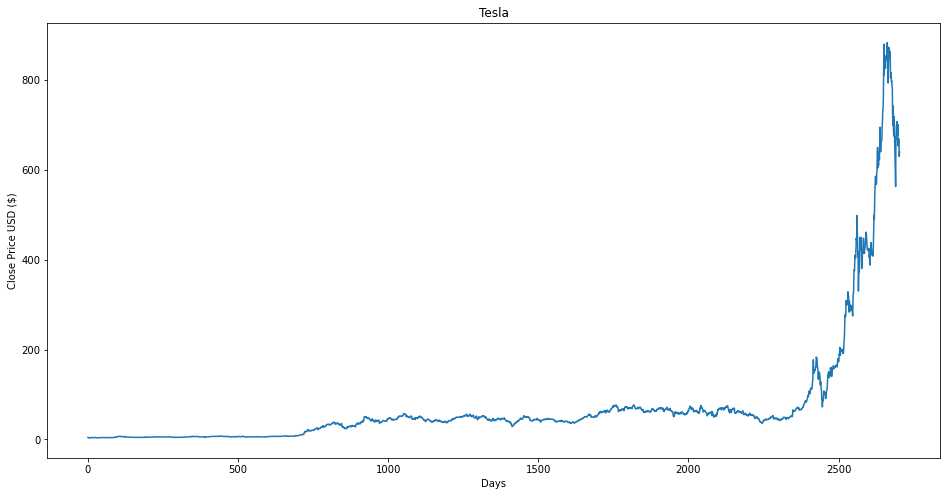

In [12]:
plt.figure(figsize=(16,8))
plt.title('Tesla')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()

### Creating dataframe and modeling based on closing price 

In [14]:
df2 = df['Close']

In [15]:
df2.tail()

2699    654.869995
2700    670.000000
2701    662.159973
2702    630.270020
2703    640.390015
Name: Close, dtype: float64

In [16]:
df2 = pd.DataFrame(df2) 

In [17]:
df2

,Close
0,4.778000
1,4.766000
2,4.392000
3,3.840000
4,3.222000
...,...
2699,654.869995
2700,670.000000
2701,662.159973
2702,630.270020


### Shifting closing price to create a prediction column

Predicting 100 days into the future.

In [18]:
future_days = 100
df2['Prediction'] = df2['Close'].shift(-future_days)

In [19]:
df2

,Close,Prediction
0,4.778000,5.978
1,4.766000,6.198
2,4.392000,6.680
3,3.840000,6.914
4,3.222000,7.094
...,...,...
2699,654.869995,NaN
2700,670.000000,NaN
2701,662.159973,NaN
2702,630.270020,NaN


In [20]:
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]


In [21]:
y = np.array(df2['Prediction'])[:-future_days]

## Linear and Decision Tree Regression

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

## Implementing Linear and Decision Tree Regression Algorithms.

In [25]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [26]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

In [28]:
df3 = pd.DataFrame(x_future)

In [29]:
df3

,0
0,205.009995
1,194.567993
2,187.056000
3,198.179993
4,196.425995
...,...
95,420.630005
96,420.279999
97,424.679993
98,406.019989


## Decision Tree Regression and future trend visualization

In [30]:
tree_prediction = tree.predict(x_future)

In [31]:
predictions = tree_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

<ipython-input-31-3343a07a945e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


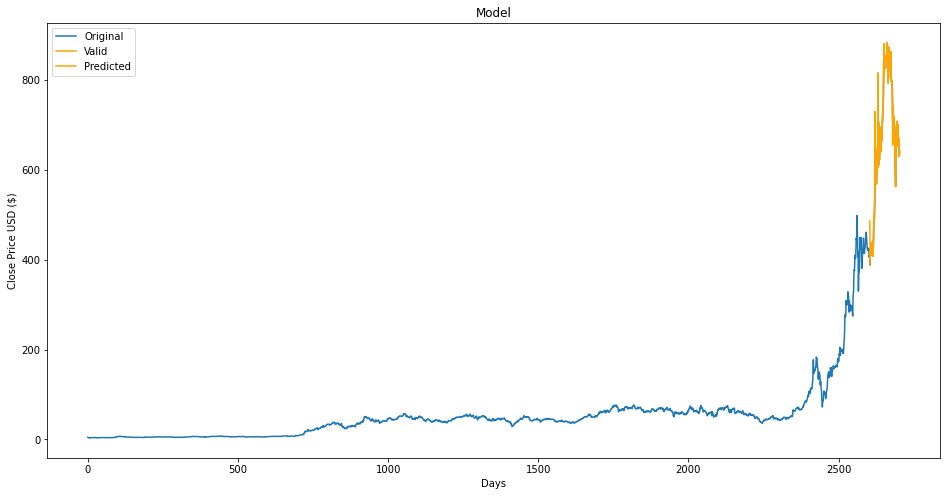

In [32]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Predictions']], color = "orange")
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()



## Linear Regression and future trend visualization

In [33]:
lr_prediction = lr.predict(x_future)

In [34]:
predictions2 = lr_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions2

<ipython-input-34-5c6ac4c930a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions2


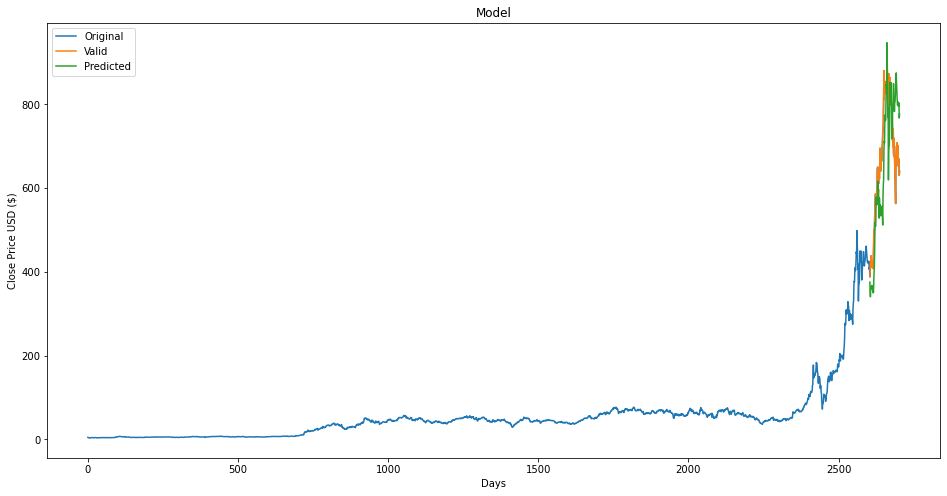

In [35]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.color="black"
plt.show()

## Model Validation

In [43]:
from sklearn import model_selection, metrics
from scipy import stats

In [46]:
df2_regr = intercept + slope * df2.index

In [47]:
metrics.r2_score(df2['Close'], df2_regr)

0.3293150956055978

In [48]:
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(df2.index,df2['Close'] )

In [49]:
metrics.mean_absolute_error(df2['Close'], df2_regr)

63.442063891286644